In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split


c:\Users\arnol04m\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- Binary Classification (cat or dog) #One label of each
- Multi-class Classification (label of foods) #One label of each but multiple available labels
- Multi-label Classification (tags for articles) #Multiple labels for each
 
Outputs for data labels is the probablity of each label being true.
 
[0.1, 0.3, 0.6] #This means that the first label is 10% true, the second is 30% true, and the third is 60% true.

## Data

In [5]:
from sklearn.datasets import make_circles

#Make 1000 data points
n = 1000
X, y = make_circles(n_samples=n, shuffle=True, noise=0.1, random_state=None, factor=0.2)

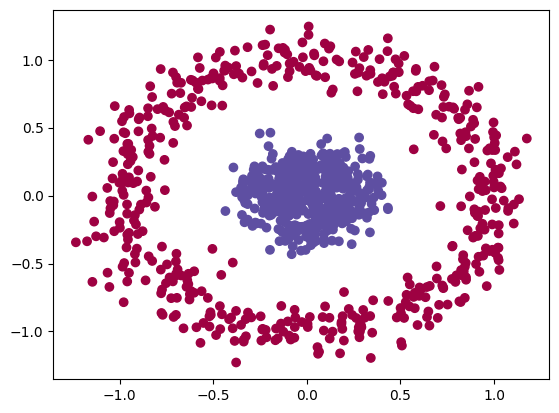

In [6]:
#Plot x and y with y determined by color
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)
plt.show()


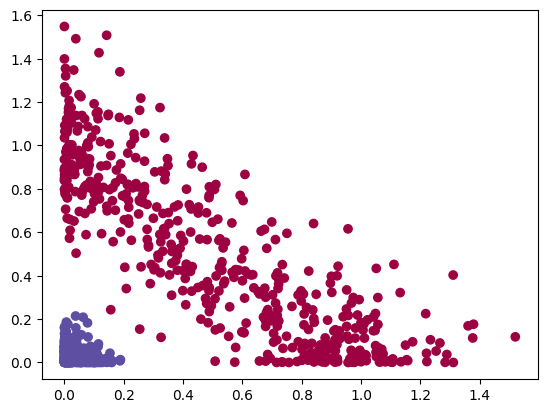

In [7]:
#Square the data for linear separability
X_squared = np.square(X)

plt.scatter(X_squared[:,0], X_squared[:,1], c=y, cmap=plt.cm.Spectral)


### Input and output shapes

In [8]:
input = X.shape[1]
#if unique values are 2 (binary), then subtract 1, else don't subtract values (multi-class)
output = np.unique(y).shape[0]-1 if np.unique(y).shape[0] == 2 else np.unique(y).shape[0]

print(f'Input : {input} Output : {output}')

Input : 2 Output : 1


In [9]:
## Convert to tensors
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

In [10]:
#Check the first 5 values
X[:5], y[:5]

(tensor([[-6.5140e-02, -8.4043e-01],
         [-7.8524e-02,  1.7398e-01],
         [-6.5190e-02, -2.9075e-01],
         [-9.4941e-01, -5.6837e-01],
         [-7.0389e-04, -2.6618e-01]]),
 tensor([0., 1., 1., 0., 1.]))

### Split Data into Train and Test

In [11]:
#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

## Build the Model

In [13]:
import torch
from torch import nn

#1. Device agnostic code
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### 2. Define the model

1. Subclasses nn.Module
2. Create 2 nn.linear()
3. Define a forward
4. Instatiate an instance of our model

In [14]:
#1. Construct a model thqt subclasses nn.Module
class CircleModel_v0(nn.Module):
    def __init__(self):
        super().__init__()
        # Create two linear layers
        
        #2. Create 2 nn.Lienar layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features = 2,out_features = 64)
        self.layer_2 = nn.Linear(in_features = 64,out_features = 1)
    
    #3. Define a forward() method that outlines the forward pass
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.layer_1(x)
        x = self.layer_2(x)
        return x

#4. Instantiate the model
model_0= CircleModel_v0().to(device)
model_0
        

CircleModel_v0(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=1, bias=True)
)

In [15]:
# Replicate the model abouve using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 64),
    nn.Linear(in_features = 64, out_features = 1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=64, bias=True)
  (1): Linear(in_features=64, out_features=1, bias=True)
)

In [16]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-4.8939e-01,  3.1829e-01],
                      [-6.4820e-01,  4.3990e-01],
                      [-2.5456e-01,  6.8647e-01],
                      [ 5.4148e-01,  2.6832e-01],
                      [ 4.1298e-01,  1.3452e-01],
                      [-5.2855e-01,  3.9265e-01],
                      [-2.8289e-01,  4.9438e-01],
                      [-5.9517e-01,  6.0579e-01],
                      [ 1.7124e-02,  1.4827e-02],
                      [ 1.5801e-01, -2.6611e-01],
                      [-1.1377e-02, -4.8926e-01],
                      [-2.9335e-01, -6.9472e-01],
                      [ 6.3035e-01, -1.2342e-01],
                      [-9.6647e-02, -2.8930e-01],
                      [ 1.8627e-01, -3.7889e-02],
                      [-2.5153e-01,  5.8091e-01],
                      [-9.4617e-02,  4.4199e-01],
                      [ 4.9650e-01, -9.3726e-02],
                      [ 5.8844e-01,  5.8857e-01],
                      [ 

### Make Predictions

In [20]:
untrained_preds = model_0(X_test.to(device))
print(f'Length of Predictions : {len(untrained_preds)}')
print(f'Shape of Predictions : {untrained_preds.shape}')
print(f'Length of Targets : {len(y_test)}')
print(f'Shape of Targets : {y_test.shape}')

Length of Predictions : 200
Shape of Predictions : torch.Size([200, 1])
Length of Targets : 200
Shape of Targets : torch.Size([200])


In [21]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.01)

In [22]:
def accuracy_fn(preds, labels):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == labels).float()
    acc = correct.sum() / len(correct)
    return acc

In [29]:
print(f'Logit (Output): \n{untrained_preds[:5]}')
print(f'Sigmoid (Probability): \n{torch.sigmoid(untrained_preds[:5])}')
print(f'Precition : \n{torch.round(torch.sigmoid(untrained_preds[:5]))}')

Logit : 
tensor([[ 0.3339],
        [-0.0016],
        [ 0.3786],
        [ 0.3177],
        [ 0.7583]], grad_fn=<SliceBackward0>)
Sigmoid: 
tensor([[0.5827],
        [0.4996],
        [0.5935],
        [0.5788],
        [0.6810]], grad_fn=<SigmoidBackward0>)
Precition : 
tensor([[1.],
        [0.],
        [1.],
        [1.],
        [1.]], grad_fn=<RoundBackward0>)
